# Exploratory Data Analysis Notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/jobs_in_data.csv')
df.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [9]:
df.shape

(9355, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [13]:
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)
company_location_counts = df['company_location'].value_counts()
print(company_location_counts)


job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64
company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador       

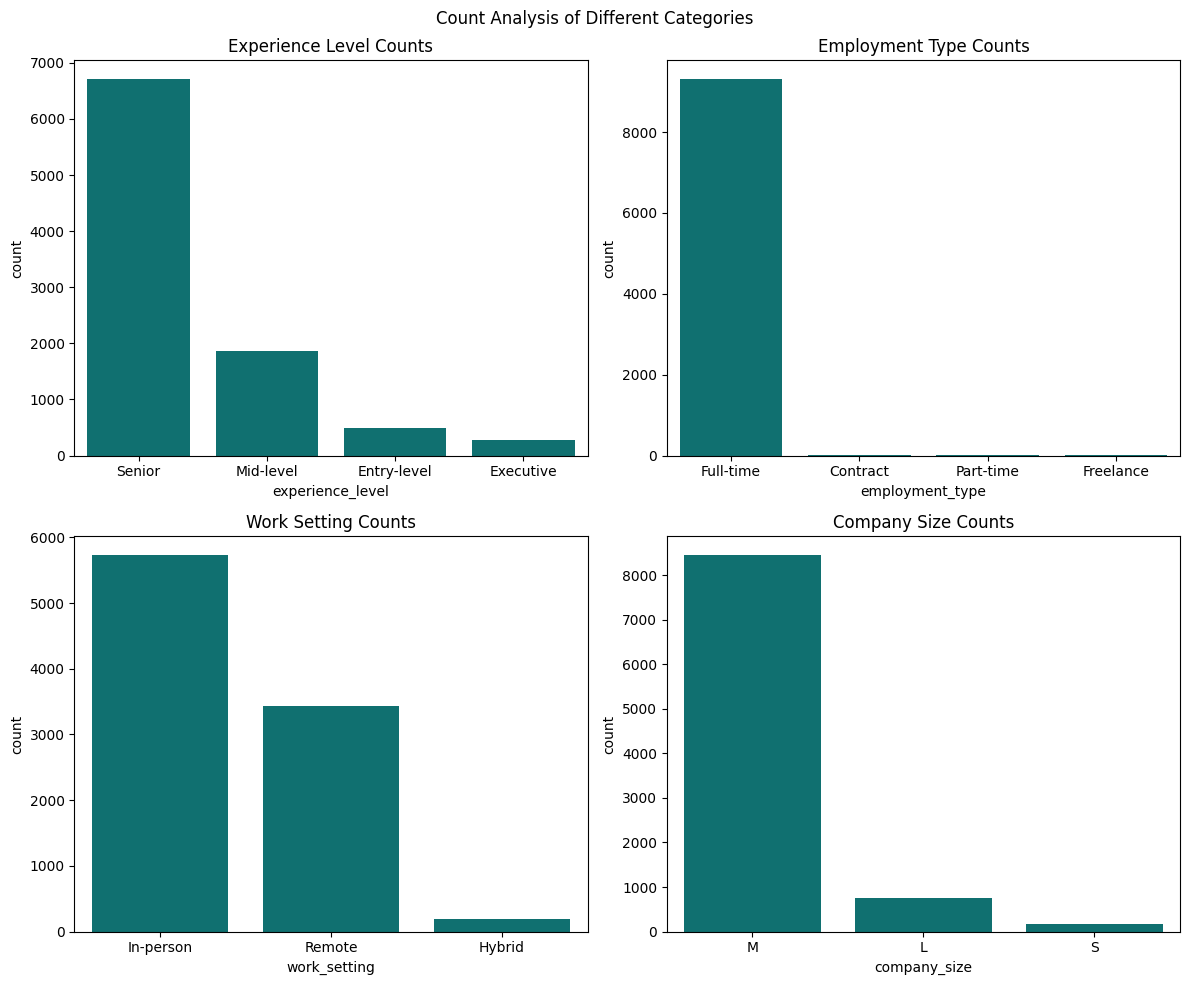

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Count Analysis of Different Categories')

sns.countplot(ax=axes[0, 0], x='experience_level', data=df, color="teal", 
              order=df['experience_level'].value_counts().index)
axes[0, 0].set_title('Experience Level Counts')

sns.countplot(ax=axes[0, 1], x='employment_type', data=df, color="teal", 
              order=df['employment_type'].value_counts().index)
axes[0, 1].set_title('Employment Type Counts')

sns.countplot(ax=axes[1, 0], x='work_setting', data=df, color="teal", 
              order=df['work_setting'].value_counts().index)
axes[1, 0].set_title('Work Setting Counts')

sns.countplot(ax=axes[1, 1], x='company_size', data=df, color="teal", 
              order=df['company_size'].value_counts().index)
axes[1, 1].set_title('Company Size Counts')

plt.tight_layout()
plt.show()